# Доклад про **OpenCV**


In [2]:
# нужно импортировать
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.animation as animation
import requests
import numpy as np
import threading
from PIL import Image
from io import BytesIO

## Часть 1. Знакомство с библиотекой, возможности ввода и вывода

Начнем знакомство с библиотекой с простейшей операции: возмем картинку попугая и отобразим её на экране.

In [3]:
image = cv2.imread("open_cv_parrot.png")
cv2.imshow("image", image) # первым параметром передается название окна, вторым изображение
cv2.waitKey(500) # эта строчка показывает насколько долго будет отображаться картинка. 0 означает бесконенчо долго
cv2.destroyAllWindows() # закрывает окно, после того как истекает время ожидания

2024-12-11 21:11:18.863 python[26607:29619209] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-11 21:11:18.863 python[26607:29619209] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Аналогично чтению изображений, мы можем записывать их в файлы с помощью функции imwrite.

In [ ]:
image = cv2.imread("open_cv_parrot.png")
cv2.imwrite("new_parrot.jpg", image, [int(cv2.IMWRITE_JPEG_QUALITY), 95])

В функцию imwrite третьим параметром можно передать некоторую информациию о сохраняемом объекте. Например, через IMWRITE_JPEG_QUALITY задать качество сохраняемого изображения, а через IMWRITE_PNG_COMPRESSION сжатие.

Однако отображать картинки в отдельном окне не всегда удобно. Этого неприятного действия можно избежать, воспользовавшись библитекой matplotlib.

In [ ]:
image = cv2.imread("open_cv_parrot.png")
plt.imshow(image)
plt.axis("off") #уберем оси, они не нужны для отображения
plt.show()

Однако стоит заметить, что попугай отобразился в некотором странном формате. Это связано с тем, что OpenCv и matplotlib хранят данные в разных форматах: BGR и RGB. (разная последовательность базовых цветов). Чтобы изображение отображалось корректно в matplotlib, необходимо сделать переход:

In [ ]:
image = cv2.imread("open_cv_parrot.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off") 
plt.show()

Кроме изображений, OpenCV также поддерживает загрузку и воспроизведение видео фрагментов. 

In [4]:
video_path = "video_parrot.mp4"
video = cv2.VideoCapture(video_path)
flag = True
while flag:
    flag, frame = video.read()
    if flag:
        cv2.imshow("frame", frame)
        cv2.waitKey(20)
cv2.destroyAllWindows() 

KeyboardInterrupt: 

Этот код устроен интересно: мы заводим цикл, в котором последовательно отображем изображения (ведь любое видео есть набор изображений). Тут уже не случайную роль играет метод .waitKey(), он отвечает за скорость видео: скоолько frame'ов будет показано за секунду времени, насколько быстро будут сменять друг друга изображения. До тех пор, пока существуют необраобтанные окна, цикл будет продолжаться. Таким образом, с помощью OpenCV можно воспроизводить видео.

Равно как и восспроизводить готовые видео, можно записывать свои и сохранять их на компьютере. Давайте запишем видео с экрана ноутбука.

In [6]:
cap = cv2.VideoCapture(1)  #захватываем поток
cv2.namedWindow('Веб-камера') 
# Устанавливаем параметры для записи видео
fourcc = cv2.VideoWriter_fourcc(*'XVID')  #формат, в котором мы сохраняем наше видео
output_file = 'output_video.avi'  # имя файла
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  #ширина
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  #высота

out = cv2.VideoWriter(output_file, fourcc, 20.0, (frame_width, frame_height)) #для записи видео в OpenCV создается специальный объект
while True: # здесь уже известный механизм отображенияqq
    ret, frame = cap.read()
    out.write(frame) #записываем пооконно в файл
    cv2.imshow('Camera Video', frame) #не забываем отобразить наш видео
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Код не особенно отличается от предыдущего, за тем исключением, что мы открываем видеопоток камеры, подключенной к ноутбуку.

Аналогично картинкам, видеоизображение можно отображть в юпитер-нотбуке с помощью mathplotlib.animation. Для этого, правда, потребуется написать немного кода.

In [ ]:
# Открытие видеофайла
video_path = 'video_parrot.mp4'
cap = cv2.VideoCapture(video_path)
# Настройка фигуры для отображения
fig, ax = plt.subplots()
ret, frame = cap.read()
# Преобразуем изображение из BGR в RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
im = ax.imshow(frame_rgb)
# Функция для обновления изображения, аналогичная тому, что мы написали в изначальн примере
def update(frame_num):
    ret, frame = cap.read()
    if not ret:
        return im,
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im.set_data(frame_rgb)
    return im,
# Настройка анимации
ani = animation.FuncAnimation(fig, update, frames=1000, interval=50, blit=True)
plt.axis('off')  # Убираем оси, они излишни, когда мы отображаем видео
plt.show()
# Закрываем видео после окончания
cap.release()

Вообще, мне не удалось добиться хорошего результата... по-моему, матплотлиб не очень предназачен для воспроизведения видео, но, наверное, оставлю в докладе как экзотический пример..) На практике так делать, по-видимому, не имеет смысла.

Немного поговорим о более сложном вводе и выводе. OpenCV - это библиотека, которая может быть часто использоваться в реальности для задач воспроизведения видео с реальных камер наблюдения. Поэтому библиотека поддерживает Network I/O.

Подключаться к реальной камере ппо её IP в рамках этого доклада я не буду, но как это устроено теоретически показать смогу.

In [ ]:
# Подключение к IP-камере через URL. Далее код аналогичен предыдущему.
url = 'rtsp://192.168.1.100:554/stream1'
cap = cv2.VideoCapture(url)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('IP Camera Stream', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Аналогично, можно подключиться к камере с сервиса. Я пробовал подключиться к twitch, но меня довольно быстро забанили.

#здесь нужно 
url = 'http://example.com/image.jpg'
response = requests.get(url)

# Так как объекты библиотеки cv2 -- это np.array, то необходимо преобразовать получаемое видео в байты NumPy массива
image_arr = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_arr, cv2.IMREAD_COLOR)

Интереснее становистя, если OpenCV обрабатывает много камер одновременно. Для качественного и быстрого видеоповтора используется многопоточное программирование и трединг.

In [ ]:
# Захват видео
cap = cv2.VideoCapture(0)
def capture_frames():
    while True:
        ret, frame = cap.read()
        if ret:
            process_frame(frame)
def process_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('Processed Frame', gray)

# Создаем поток для захвата кадров
capture_thread = threading.Thread(target=capture_frames)
capture_thread.start()

while True:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Такой код полезен, если при захвате видео-изображения происходит какой-то трудозатратный процессор. Например, алгоритмами машинного обучения OpenCV пытается распознать лицо в кадре. Пока идут расчеты, можно начать захват следующие отображения. Этим и оправдывается использование трединга.

## Часть 2. Базовые операции с изображениями: от простых до сложных и интересных фильтров.

In [8]:
#чтобы каждый раз не открывать изображение в отдельном окне.
def pltsh(image, title="Image", cmap=None):
    # Конвертируем изображение из BGR в RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb, cmap=cmap)
    plt.title(title)
    plt.axis('off')  
    plt.show()

Начнем с того, какие характеристики изображения, которое передаются cv2, мы можем просмотреть. Это довольно очевидная часть, но, на мой взгляд, на ней тоже следует остановиться.

Просто приведу в следующем блоке кода все основные характеристики.

In [4]:
image = cv2.imread('open_cv_parrot.png')
height, width, channels = image.shape
print(f"Высота: {height} пикселей")
print(f"Ширина: {width} пикселей")
print(f"Количество каналов: {channels}") #число компонент цвета, из которых составляется изображение. Как правило, их три.

Высота: 1082 пикселей
Ширина: 702 пикселей
Количество каналов: 3


Заодно немного поговорим о каналах. Для них удобно использовать функцию cv2.merge, она позволяет вручную строить многоканальное изображение. Так, мы можем заглушить все каналы кроме какого-то одного и получить очень модного попугая. 

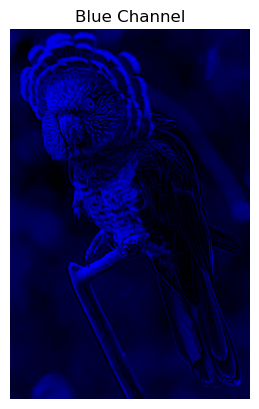

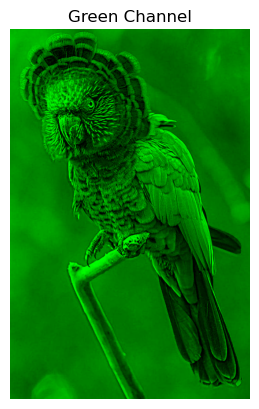

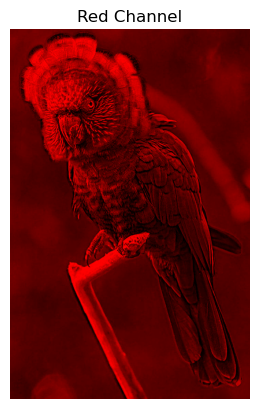

: 

In [9]:
blue, green, red = cv2.split(image)
zeros = np.zeros_like(blue)
blue_image = cv2.merge([blue, zeros, zeros])   
green_image = cv2.merge([zeros, green, zeros])  
red_image = cv2.merge([zeros, zeros, red])     
# Отображаем каждый канал как цветное изображение
pltsh(blue_image, title="Blue Channel")
pltsh(green_image, title="Green Channel")
pltsh(red_image, title="Red Channel")

Еще интересное, что можно делать с изображением в opevCV, так это собирать статистику. Например, строить гистограмму интенсивности пикселей.

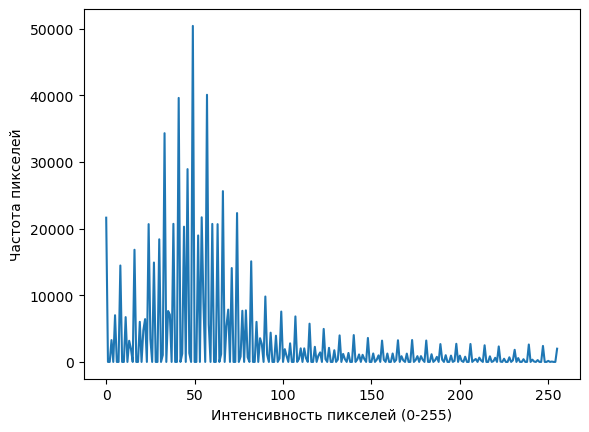

In [19]:
# гистограмма синего канала
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.xlabel('Интенсивность пикселей (0-255)')  # Ось X: уровень яркости
plt.ylabel('Частота пикселей')                # Ось Y: количество пикселей для каждого значения
plt.plot(hist)
plt.show()

Это может быть полезно если мы, например, исследуем спектрограмму звукового сигнала и нам важно понять, насколько интенсивен какой-то цвет, где цвет отображает мощность звука определенной частоты.

Ну, теперь с таким багажом знания, перейдем к фильтрам. Попробуем реализовать некоторые интересные фильтры, как на курсе С++ в image_processor

#### Ресайзинг изображений

In [6]:
image = cv2.imread("open_cv_parrot.png")
height, wiedth, _ = image.shape
print(height, wiedth) # изначальные параметры картинки

702


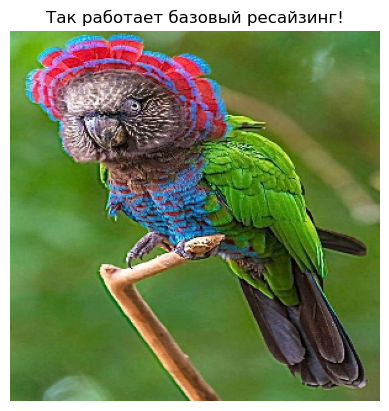

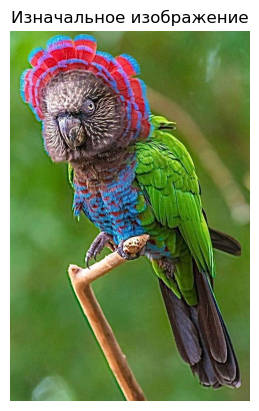

In [5]:
# делаем ресайзинг
image = cv2.imread("open_cv_parrot.png")
new_size = (300, 300)
resized_image = cv2.resize(image, new_size)
pltsh(resized_image, "Так работает базовый ресайзинг!")
pltsh(image, "Изначальное изображение")


In [6]:
height, width, _ = resized_image.shape
print(height, width) # убеждаемся, что теперь тот размер, который нам нужен

300 300


При ресайзинге OpenCV производит перераспределение пикселей, чтобы в новом размере изображение сохранило исходную информацию. Однако небольшие потеря в качестве все таки неизбежны: при сжатии изображения мы удаляем избыточные в реалиях нового размера пикселя, а при расширении интерполируем (заполняем пропуски средними), отчего, конечно, картинка страдает.

Чтобы сжимать и растягивать изображения с минимальными потерями в качестве, можно пользоваться различными интерполяциями. Давайте рассмотрим примеры.

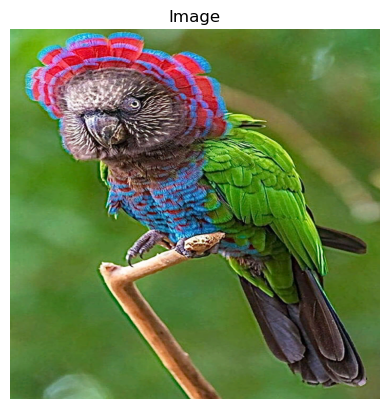

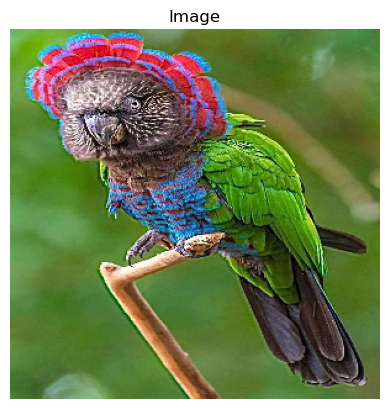

In [10]:
# кубическая интерполяция для раастяжение картинок, берет среднее по 16 соседним пикселям
wide_width = 1048
wide_height = 1048
sharp_width = 300
sharp_height = 300
wide_image = cv2.resize(image, (wide_width, wide_height), interpolation=cv2.INTER_CUBIC)
mini_image = cv2.resize(image, (sharp_width, sharp_height), interpolation=cv2.INTER_LANCZOS4)
pltsh(wide_image)
pltsh(mini_image)

Получилось немного лучше)

Однако можно добиться результата, в котором вообще нет потери качества. Rак в PowerPoint можно растягивать и сжимать изображения без потерь, двигая их за "уголок", в OpenCV  используются пирамиды изображений: совокупность изображений, которые как бы образуют пирамиду по свому размеру. Используются гауссова пирамида (для каждого уровня вначале применяется фильтр Гаусса, а затем идет понижение разрешения) и пирамида Лапласа. Применение пирамид, в частности использование в них гауссового размытия, позволяют свести потери в качестве при ресайзинге практически к нулю. Не будем углубляться в математику процесса, вместо этого покажем на примере, как это работает.

In [3]:
image = cv2.imread('open_cv_parrot.png')
while True:
    rows, cols, _ = image.shape
    cv2.imshow('Pyramids', image)
    k = cv2.waitKey(0)
    if k == 27:
        break
    elif chr(k) == 'i':
        image = cv2.pyrUp(image, dstsize=(2 * cols, 2 * rows))
    elif chr(k) == 'o':
        image = cv2.pyrDown(image, dstsize=(cols // 2, rows // 2))
cv2.destroyAllWindows()

2024-12-10 10:19:12.787 python[7766:28792733] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-10 10:19:12.787 python[7766:28792733] +[IMKInputSession subclass]: chose IMKInputSession_Modern


#### Кроп

Здесь ничего особенно интересного, поэтому просот приведу код, который нарезает картинку

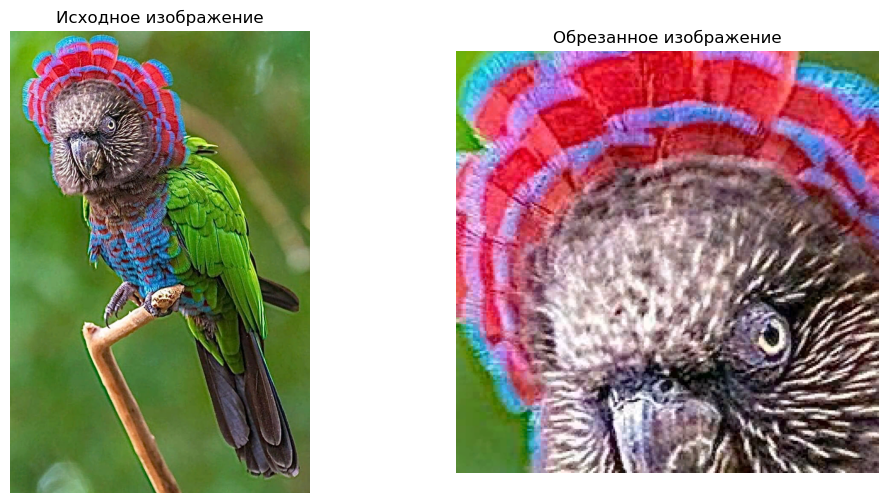

In [12]:
# Загружаем изображение
image = cv2.imread('open_cv_parrot.png')
# Определяем координаты обрезки (x1, y1 - верхний левый угол, x2, y2 - нижний правый угол)
x1, y1 = 50, 50    
x2, y2 = 300, 300 
# Обрезаем изображение
cropped_image = image[y1:y2, x1:x2]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Исходное изображение")
plt.axis('off')

# Обрезанное изображение
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title("Обрезанное изображение")
plt.axis('off')

plt.show()

Как глубоко и проникновенно смотрим на нас этот попугай!

#### Модели цвета

Рассмотрим чуть подробнее тему базовых цветов, мз которых составляется изображения и что нам это поможет сделать.

Существуют разные цветовые модели, в которых визуализируется изображается. Для человеческого глаза привычен формат RGB, но OpenCV дает возможность применить к картинкам другие цветовые модели, которые могут быть полезны для задач компьютерного зрения или очистки изображений от шума.
Особенно популярна для задач машинного обучения модель HSV. Вместо RGB, где пиксели раскладываются на красный, зеленый и синий, пиксели имеют *hue*, оттенок, *saturation*, насыщенность, и *value*, яркость. 

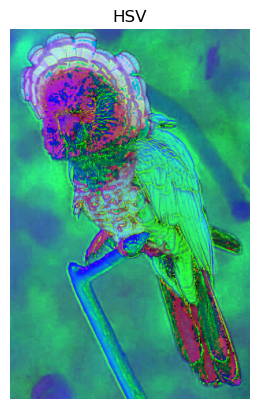

In [14]:
image = cv2.imread('open_cv_parrot.png')
# Преобразуем изображение в HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.plot(1, 2, 2)
plt.imshow(image_hsv)
plt.title("HSV")
plt.axis('off')
plt.show()

Выглядит жутко, но на самом деле модель HSV может быть довольно полезной. Например, она очень удобна для того, чтобы выделять на картиках сегменты какого-то определенного цвета. 

Для распознавания оттенков удобно исопльзовать именно HSV, так как там существует отдельнные параметры яркости и насыщеннтсти. Если пытаться выделить сегмены цвета в RGB, то можно наткнуться на проблему оттенков цвета и не распознать все необходимые участски, так как разные оттенки одного и того же оттенка кодируются неочевидно по-разному.

В HSV нахождение сегментов производится очень легко. Для этого необходимо знать код цвета, который мы ищем, а дальше просто задавать нижние границы насыщенности и яркости. 

Задавать эти характеристики можно в обычном массиве: ```color = np.array([код цвета, минимальное значение насыщенности, минимальное значение яркости])```
Далее используем метод ```.inRange()```, чтобы создать битмаску для выделения нужных фрагментов. Этот метод назначает "хорошим" фрагментам белый цвет (255), а "плохие" зануляет, то есть делает черными.

Если у нас есть несколько диапазонов подходящих нам оттенков, то объединяем битмаски с помощью метода ```.bitwise_or()```. Это работает по принципу логического оператора дизъюнкции (OR).

Затем применяем битмаску к исходному изображению с помощью ```.bitwise_and()```. Это оставит на картинке только интересующие нас объекты. Принцип работы такой: идет побитовое сравнение нашей маски и исходного изображения. Если в маске стоит значение 255, то пиксель остается, если 0 — то зануляется, и пиксель исходного изображения удаляется.

Давайте выделим в нашем попугае все красные участки.

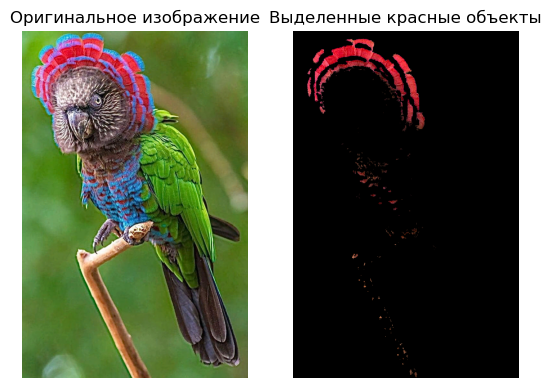

In [17]:

image = cv2.imread('open_cv_parrot.png')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red1 = np.array([0, 120, 70])  # Нижняя граница (оттенок, насыщенность, яркость)
upper_red1 = np.array([10, 255, 255])  # Верхняя граница первого диапазона
lower_red2 = np.array([170, 120, 70])  # Второй диапазон красного
upper_red2 = np.array([180, 255, 255])
mask1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)

# Применяем маску к изображению
result = cv2.bitwise_and(image, image, mask=mask)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Оригинальное изображение")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title("Выделенные красные объекты")
plt.axis('off')
plt.show()


Можем попробовать привести более реалистичный пример. Рассмотрим дорогу и попытаемся распознать на ней дорожные знаки: их специально делают яркими, резко отличающимися от обыкновенных объектов улицы.

Дорожные знаки удобно распознавать по контурам. Поэтому используем здесь метод ```.findContours```. Возьмем параметр ```RETR_EXTERNAL```, чтобы ограничить контуром дорожный знак. Также используем метод аппроксимации контуров ```.CHAIN_APPROX_SIMPLE```, чтобы брать для контура не все точки, а только важные. Для нас этот параметр не особенно важен, но используем его, чтобы показать возможности библиотеки. Если контуры достаточно большие, то это становится необходимым для экономии памяти и скорости обработки.

Чтобы заполнить области внутри найденных контуров, воспользуемся методом ```.drawContours```, который позволяет заполнить кодом 255 элементы внутри контура с помощью параметра ```thickness=cv2.FILLED```

О выделении контуров в этом докладе еще поговорим подробнее в блоке про фильтры.

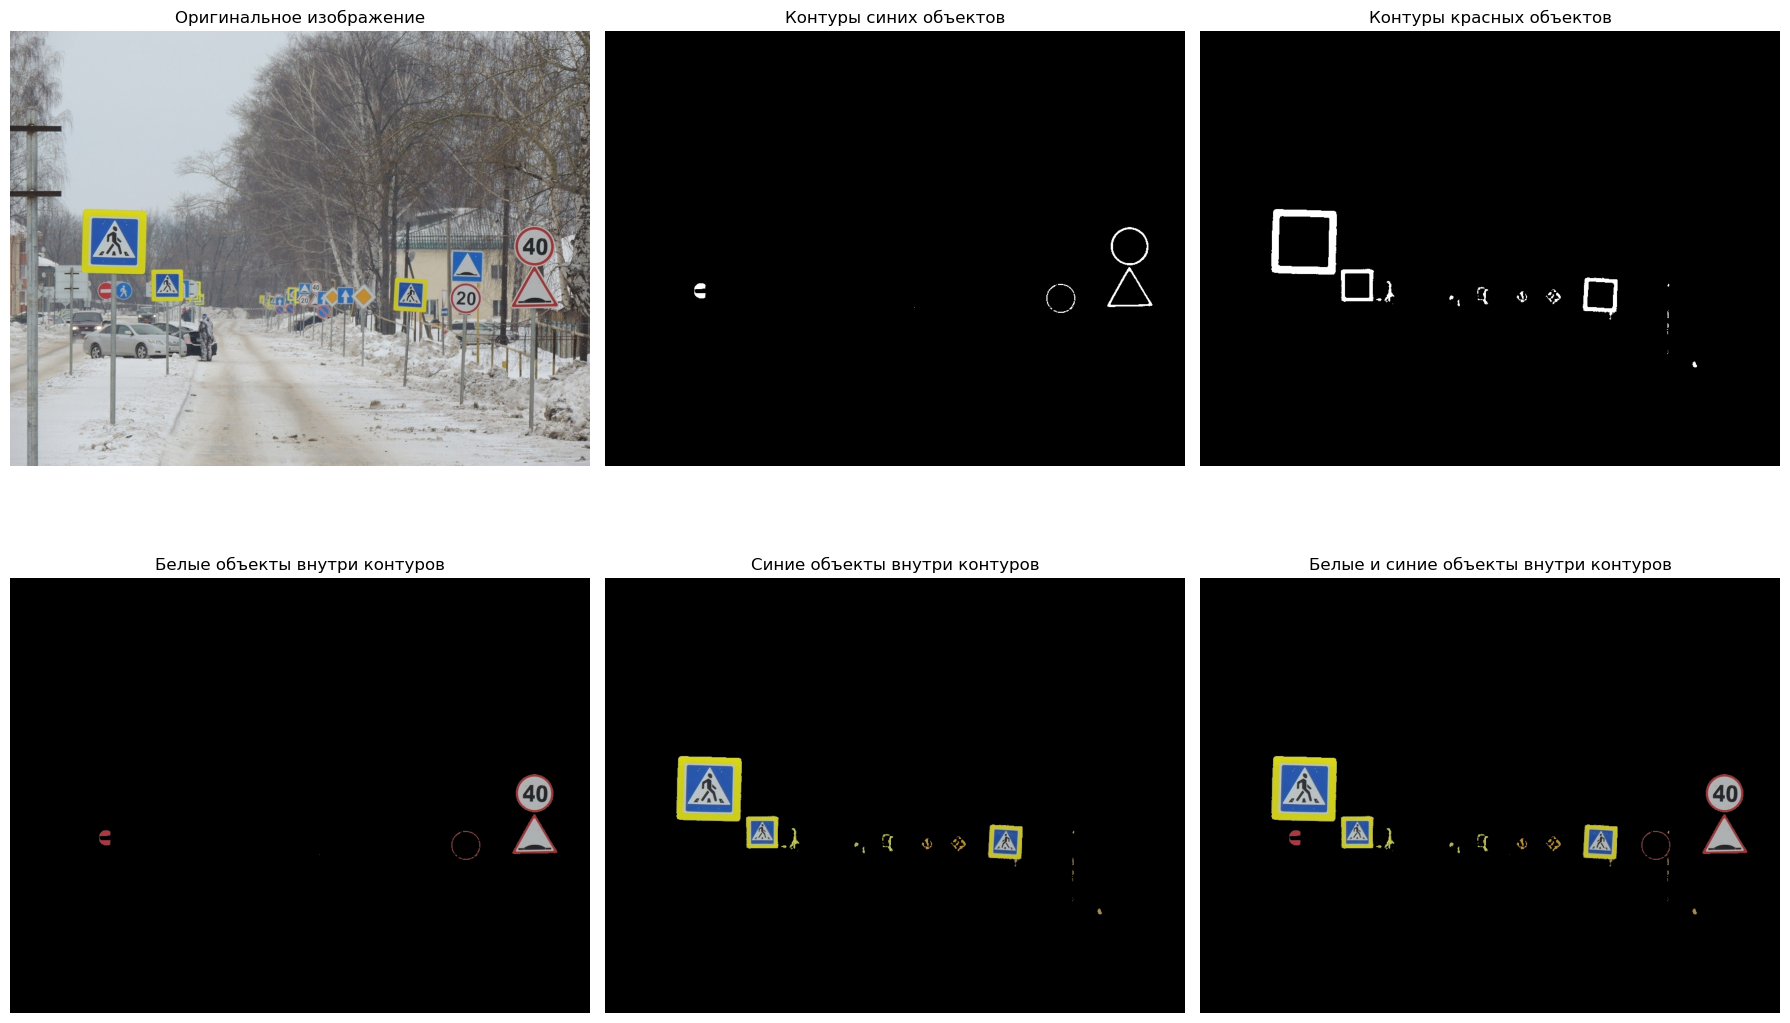

In [27]:
image = cv2.imread('road.jpeg') 
# Преобразуем изображение из BGR в HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Выделение красных объектов 
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Создаём пустую маску для заполнения областей внутри контуров красных объектов
mask_red_filled = np.zeros_like(mask_red)
# Заполняем маску внутри контуров для красных объектов
cv2.drawContours(mask_red_filled, contours_red, -1, (255), thickness=cv2.FILLED)
# Применяем маску к оригинальному изображению для красных объектов
result_red = cv2.bitwise_and(image, image, mask=mask_red_filled)
# Выделение жёлтых объектов
lower_yellow = np.array([20, 100, 100])  
upper_yellow = np.array([40, 255, 255])  #
mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
#Нахождение контуров для жёлтых объектов
contours_yellow, _ = cv2.findContours(mask_yellow, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask_yellow_filled = np.zeros_like(mask_yellow)
cv2.drawContours(mask_yellow_filled, contours_yellow, -1, (255), thickness=cv2.FILLED)
result_yellow = cv2.bitwise_and(image, image, mask=mask_yellow_filled)
# Объединяем
final_result = cv2.add(result_red, result_yellow)
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Оригинальное изображение")
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(mask_red, cmap='gray')
plt.title("Контуры синих объектов")
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(mask_yellow, cmap='gray')
plt.title("Контуры красных объектов")
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB))
plt.title("Белые объекты внутри контуров")
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(result_yellow, cv2.COLOR_BGR2RGB))
plt.title("Синие объекты внутри контуров")
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.title("Белые и синие объекты внутри контуров")
plt.axis('off')
plt.tight_layout()
plt.show()

По-моему, получилось неплохо! Что-то похожее реализовано в современных автомобилях: они могут камерами по ходу движения распознавать дорожные знаки, а затем отображть их на панели управления водителя.

#### Фильтры и их использование на практике

Часто для задач компьютерного зрения перед тем как применить некоторой алгоритм важно преобразовать изображение, удалить шум или выделить значимые части. Этих эффектов можно добиваться с помощью библиотеки OpenCV 

Начнем с блюра. Этот фильтр уменьшает шум изображения и делает его более гладким. Применяется с помощью функции ```.[вид блюра]Blur```. Давайте покажем на примере, как это позволяет избавиться от шума на картинке. Воспользуемся классическом способом добавления шума к изображения, добавим черные и белые пиксели. А потом применим разные варианты блюра с помощью cv2 и сравним результаты.

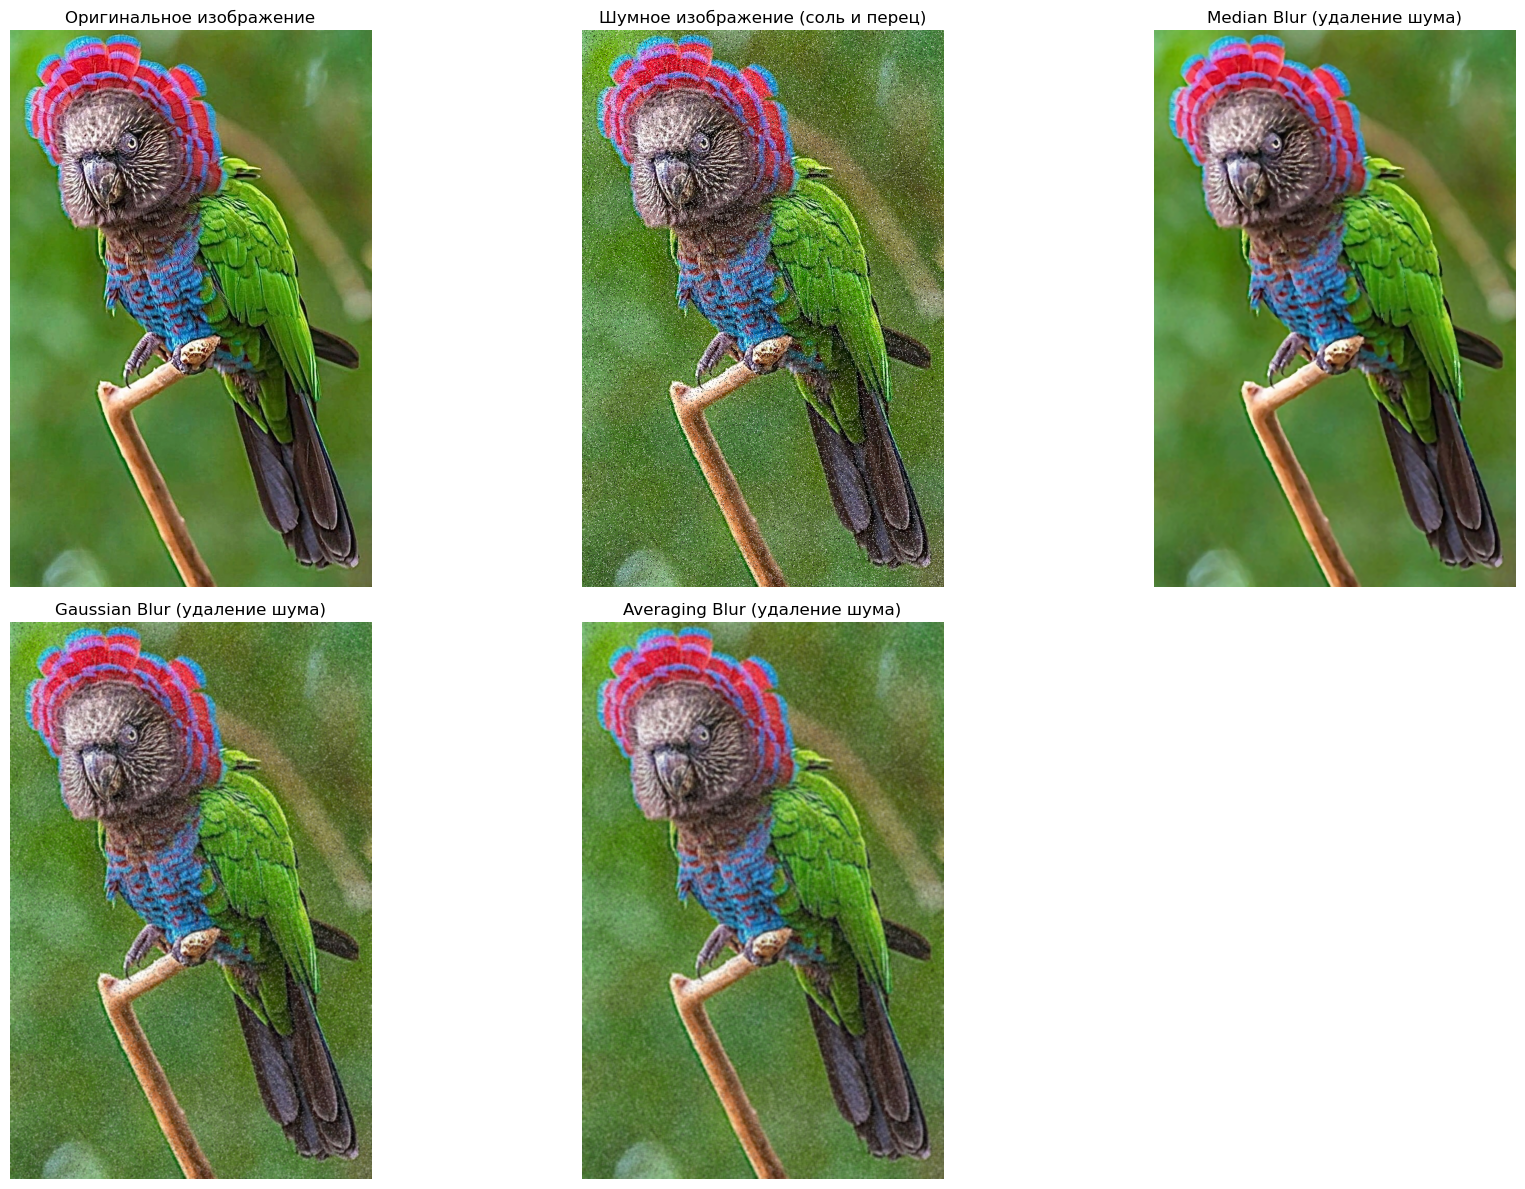

In [40]:
image = cv2.imread('new_parrot.jpg')
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    num_salt = int(salt_prob * image.size)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1], :] = 255  
    num_pepper = int(pepper_prob * image.size)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1], :] = 0  
    return noisy_image
noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
median_blurred = cv2.medianBlur(noisy_image, 5)
gaussian_blurred = cv2.GaussianBlur(noisy_image, (5, 5), 0)
averaging_blurred = cv2.blur(noisy_image, (5, 5))
plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Оригинальное изображение")
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Зашумленное изображение")
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
plt.title("Median Blur")
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(gaussian_blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(averaging_blurred, cv2.COLOR_BGR2RGB))
plt.title("Averaging Blur")
plt.axis('off')
plt.tight_layout()
plt.show()


Как видно, с нашим незамысловатым шумом лучше всего справляется медианный блюр. Это так, потому что сгенерированный шум резко отличается от общего цветовой гаммы изображения. Так как медианный блюр берет для пикселей арифметическое значение окрестности, то такие шумовыве выбросы им сглаживаются лучше всего.

Теперь рассмотрим фильтр threshold. Он оказывается очень удобен, когда необходимо перевести изображение в состоянии битовой маской и поставить единички (белый цвет) на те объекты, которые мы хотим выделить. Например, обвести их или пересчитать (второе будет немедленно следовать из первого, достаточно добавлять в счетчик каждый новый контур).

Для начачала введем модель цвета GRAY, так как нас не интересует цвет птиц, нам важна только насыщенность.
Далее применим threshold. Это концептуально очень простой фильтр, который позволяет быстро выделить интересующиеи объекты. Структура запроса такая:
```cv2.threshold([изображение, пороговое значение, значение для пикселей выше порога, флаг пороговой обработки])```.

После этого рисуем контур. Напишем аналогичным образом структуру запроса к контуру: ```cv2.findConTours([изображение], [метод извлечения], [способ извлечения])```. Про последний флаг я уже писал выше, поэтому имеет смысл написать что-то лишь про метод извлечения: можно извлекать внешние контуры объектов (под объектами понимаются части изображения с значениями пикселей в 255), а также существует возможность илвекать внутренние контуры. Но это нам сейчас будет не нужно. За дело!

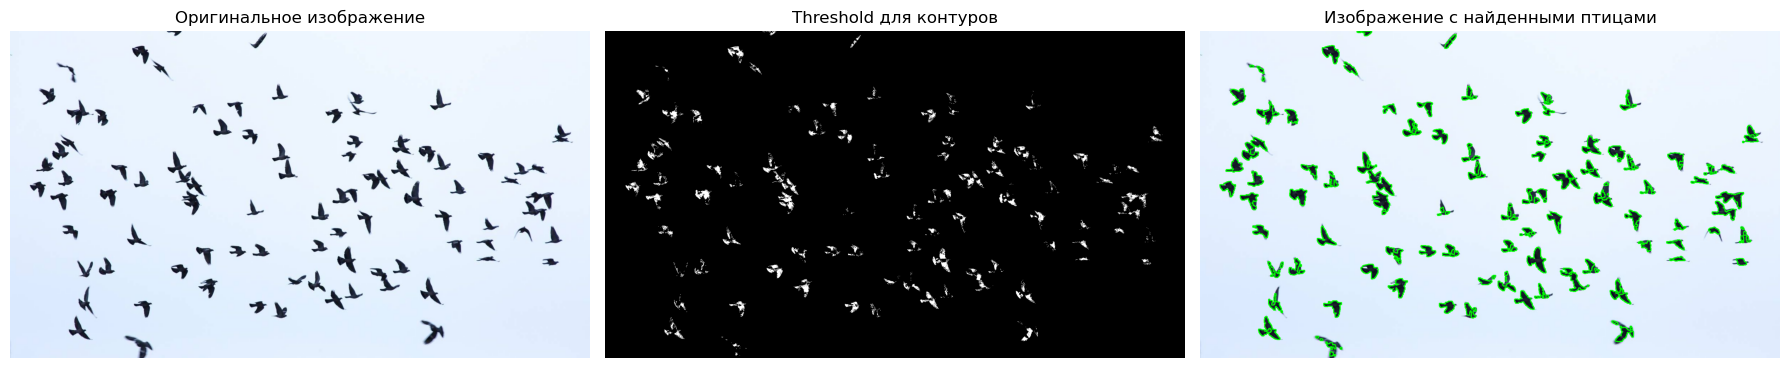

Количество птиц на изображении: 154


In [20]:
image = cv2.imread('birds.jpg')
# готовим изображение к нанесению контура
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # переводим в оттенки серого
_, thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV) # выделяем птиц
blurred_thresh = cv2.GaussianBlur(thresh, (5, 5), 0) # далем размытие, чтобы удалить шум неба (поэтично звучит)
contours, _ = cv2.findContours(blurred_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #обрамлеем птиц в контуры
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
ax[0].set_title("Оригинальное изображение")
ax[0].axis('off') 
ax[1].imshow(thresh, cmap='gray')  
ax[1].set_title("Threshold для контуров")
ax[1].axis('off')
ax[2].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  
ax[2].set_title("Изображение с найденными птицами")
ax[2].axis('off')
plt.tight_layout()
plt.show()
print(f'Количество птиц на изображении: {len(contours)}') # столько птиц на изображении!


### Небольшая часть про рисование фигур и написание текста на изображениях

OpenCV также располагает быстрыми и удобными инструментыми для рисование объектов на изображении и написании текста. Это не очень сложно, но довольно полезно для решения задач компьютерного зрения: позволяет подчеркнуть выделенные алгоритмами глубинного обучения, вывести текстом результаты обработки. Напишем небольшой код, в котором отразим основные методы.

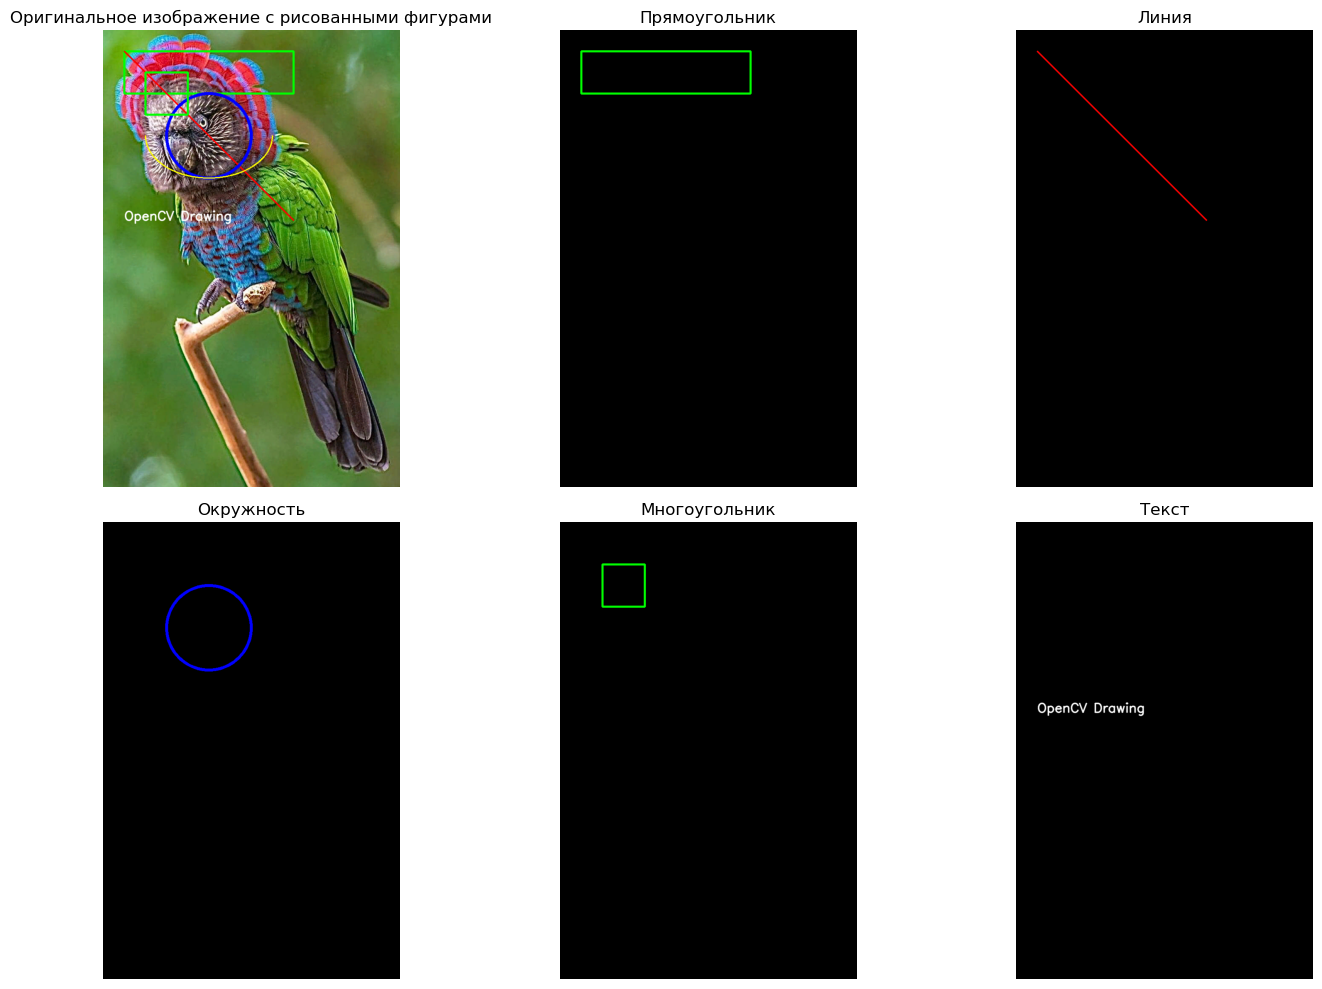

In [6]:
image = cv2.imread("open_cv_parrot.png")
# Рисуем прямоугольник
cv2.rectangle(image, (50, 50), (450, 150), (0, 255, 0), thickness=3) 
# Рисуем линию
cv2.line(image, (50, 50), (450, 450), (0, 0, 255), thickness=2) # здесь: координаты центра, радиус, цвет (в формате RGB)
# Рисуем окружность
cv2.circle(image, (250, 250), 100, (255, 0, 0), thickness=5)
# Рисуем эллипс
cv2.ellipse(image, (250, 250), (150, 100), 0, 0, 180, (0, 255, 255), thickness=2)
# Рисуем многоугольник
pts = np.array([[100, 100], [200, 100], [200, 200], [100, 200]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=3) # рисование многоугольников по точкам
# Добавляем текст
cv2.putText(image, 'OpenCV Drawing', (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA) # четвертый параметр: шрифт
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Оригинальное изображение с рисованными фигурами')
axes[0, 0].axis('off')
image_rect = np.zeros_like(image)
cv2.rectangle(image_rect, (50, 50), (450, 150), (0, 255, 0), thickness=3)
axes[0, 1].imshow(cv2.cvtColor(image_rect, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Прямоугольник')
axes[0, 1].axis('off')
image_line = np.zeros_like(image)
cv2.line(image_line, (50, 50), (450, 450), (0, 0, 255), thickness=2)
axes[0, 2].imshow(cv2.cvtColor(image_line, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Линия')
axes[0, 2].axis('off')
image_circle = np.zeros_like(image)
cv2.circle(image_circle, (250, 250), 100, (255, 0, 0), thickness=5)
axes[1, 0].imshow(cv2.cvtColor(image_circle, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Окружность')
axes[1, 0].axis('off')
image_polygon = np.zeros_like(image)
pts = np.array([[100, 100], [200, 100], [200, 200], [100, 200]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(image_polygon, [pts], isClosed=True, color=(0, 255, 0), thickness=3)
axes[1, 1].imshow(cv2.cvtColor(image_polygon, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Многоугольник')
axes[1, 1].axis('off')
image_text = np.zeros_like(image)
cv2.putText(image_text, 'OpenCV Drawing', (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
axes[1, 2].imshow(cv2.cvtColor(image_text, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Текст')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()


## Часть 3. Использование Open CV для решения задач компьютерного зрения

В целом, мы уже затронули эту тему в предыдущих блоках. Но здесь давайте разберем некоторые яркие примеры, в которых сможем применить методы OpenCV из прошлых частей для компьютерного зрения.

##### Распознование лица человека на видео.

В этом примере используются предобученные модели машинного обучения OpenCV ```Haar Cascade Classifiers ```. Эти легковесные классификаторы могут довольно быстро и точно распознавать объектына изображении. На практике все работает довольно понятно: методом ```.CascadeClassifier``` загружается нужный классификатор, далее для лучшей производтиельности оставляем в изображении только насыщенность цветов и применяем метод классификаторов ```.detectMultiScale```, который возвращает координаты найденных объектов.

In [3]:
# Загрузка предварительно обученных каскадных классификаторов из OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
# Не можем захватить поток 0, потому что его занял дурацкий OBS
cap = cv2.VideoCapture(1)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Оттенки серого
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    # Если больше одного человека в кадре, то нужно перебрать все лица из кадра
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2) # рисуем прямоугольник вокруг лица
        cv2.putText(frame, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2) #добавляем надпись
        roi_gray = gray[y:y + h, x:x + w] 
        roi_color = frame[y:y + h, x:x + w]
        # Обнаруживаем глаза
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(20, 20))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
            cv2.putText(frame, "Eye", (ex + x, ey + y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    cv2.imshow('Распознавание лица и глаз', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Как видно, в целом код рабоатет. Да, есть некоторые сложности с распознованием глаз, модель считывает и ноздри, но зато сами глаза определяет всегда. Думаю, можно попробовать наложить какие-то дополниельные фильтры для удаления шума с фреймов или добавить характеристики размеров глаз, тогда эта проблема исчезнет. Но так как наш доклад посвящен OpenCV, а не машинному обучению, то делать этого я не буду.

##### Продолжение: нанесиение блюра на распознанное лицо.

Сделаем простое улучшение кода: мы научились распознавать лицо, применим гауссово размытие к той части изображение, где находится лицо, сделаем человека невидимым для камеры!

In [5]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(1) 
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        # Создаем маску для области лица 
        face_roi = frame[y:y + h, x:x + w]
        face_blurred = cv2.GaussianBlur(face_roi, (41, 41), 30)  # сильно блюрим
        frame[y:y + h, x:x + w] = face_blurred
    cv2.imshow('Face Blur', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Еще простой, но полезный и смешной способ применить филтры - наложить инстаграмные маски. Давайте сделаем это.

Здесь не будет ничего нового, лишь компиляция тех приемов, которые уже освещены в прошлых частях доклада.

In [16]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Загрузка изображения шляпы с альфа-каналом (прозрачный фон)
hat = cv2.imread('hat.png', -1) 
cap = cv2.VideoCapture(1)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        resized_hat = cv2.resize(hat, (w, int(hat.shape[0] * w / hat.shape[1])))  # Подгоняем шляпу по ширине
        h_height = int(y - resized_hat.shape[0])  # Позиция шляпы будет чуть выше лица
        for i in range(0, resized_hat.shape[0]):
            for j in range(0, resized_hat.shape[1]):
                if resized_hat[i, j][3] != 0:  
                    frame[y + i - resized_hat.shape[0], x + j] = resized_hat[i, j][:3]

    cv2.imshow("Face Filter with Hat", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


Не то что бы получился гениальный фильтр, но возможности библиотеки показать точно удалось: добавили изображение, сделали его прозрачным, выполнили ресайз, чтобы покрыть всю голову, циклами разместили изображение на экране. Победа!

#### Распознавание QR-кодов

Другая интересная функция: декодирование QR кодов. Благодаря возмонжстям OpenCV можно сделать интерактивную выставку, отображая на стенах вместо QR кодов произведения искусства. Покажу, как это работает.

In [96]:
qr_detector = cv2.QRCodeDetector()
cap = cv2.VideoCapture(1)
found_qr_codes = {}
markers = {}  
def find_green_dot(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_green = np.array([35, 100, 100])  
    upper_green = np.array([85, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        M = cv2.moments(largest_contour)
        if M["m00"] != 0:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            return (cx, cy)
    return None
def load_gif(gif_url):
    try:
        response = requests.get(gif_url)
        img_data = np.frombuffer(response.content, np.uint8)
        gif_image = Image.open(BytesIO(img_data))
        return gif_image
    except Exception as e:
        return None
def get_next_frame_from_gif(gif_image):
    try:
        if gif_image.tell() == gif_image.n_frames - 1:
            gif_image.seek(0)
        else:
            gif_image.seek(gif_image.tell() + 1) 
        return np.array(gif_image.convert("RGB"))
    except EOFError:
        gif_image.seek(0)
        return np.array(gif_image.convert("RGB"))
    except Exception as e:
        return None

while True:
    ret, frame = cap.read()
    if not ret:
        break
    decoded_info, points, _ = qr_detector.detectAndDecode(frame)

    if decoded_info:
        if decoded_info not in found_qr_codes:
            try:
                gif_image = load_gif(decoded_info)
                
                if gif_image:
                    pts = np.int32(points) 
                    rect = cv2.boundingRect(pts) 
                    x, y, w, h = rect

                    found_qr_codes[decoded_info] = {'coords': (x, y, w, h), 'gif': gif_image}
                    center_x = int(x + w / 2)
                    center_y = int(y + h / 2)
                    markers[decoded_info] = (center_x, center_y)

            except Exception as e:
                print(f"{e}")

    for qr_code, data in found_qr_codes.items():
        coords = data['coords']
        gif_image = data['gif']

        if qr_code in markers:
            green_dot = find_green_dot(frame)

            if green_dot:
                markers[qr_code] = green_dot  

                center_x, center_y = green_dot

                gif_frame = get_next_frame_from_gif(gif_image)

                resized_image = cv2.resize(gif_frame, (coords[2] * 2 // 3, coords[3] * 2 // 3))  

                image_height, image_width = resized_image.shape[:2]
                if center_y - image_height // 2 >= 0 and center_y + image_height // 2 < frame.shape[0] and \
                   center_x - image_width // 2 >= 0 and center_x + image_width // 2 < frame.shape[1]:
                    frame[center_y - image_height // 2 : center_y + image_height // 2,
                          center_x - image_width // 2 : center_x + image_width // 2] = resized_image

    cv2.imshow('QR Code GIF Display', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Посмотрите, что получилось, я прикрепил видео к гугл диску, "разум чист.mov"

Опишу, как мой код устроен.

Если бы мы хотели распознавать только картинки, то задача была бы гораздо проще: их можно просто скачивать по ссылке. Но OpenCV позволяет также проигрывать по QR видео и гиф изображения. Для ```GIF``` я написал отдельную функцию: она извлекает покадрово фреймы, а когда доходит до последнего, зацикливает картинку. Работает хорошо с точностью до небольших ошибок, связанных с определением конца кадра, мне показалось, что самый простой способ исправить это -- обрабатывать исключение. 

Далее ничего нового: захватываем видеопоток (будьте осторожны, если на компьютере установлено также OBS) и создается объект ```QRDetector```, ответственный за считывание изображения. Далее методом ```detectAndDecode``` распознаем код и дешифруем его. 

После request-запроса на сайт переходим ко второй интересной части: прикрепление распознанной картинке к QR-коду. Хочется, чтобы изображение передвигалось по экрану вместе с QR, однако сделать этого без дополнительных функций не получается: при переходе к каждому новому фрейму детектор срабатывает заново из-за чего изображение постоянно перезагружается и рябит в глазах. 

Чтобы решить эту проблему, я принял решение поставить на QR код метку ядовито зеленого цвета, которого точно нет на видео. Методами, разобраннами в части про модели цвета и HSV, она распознается на экране, её местоположение поддерживается актуальным на протяжении всего видео. Распознавание цвета благоодаря HSV работает очень быстро (во много раз быстрее, чем считывание QR кода), поэтому такой сопосб не дает лагов: видео идет плавно. 


И немножко о технической части кода: все распознанные QR кода добавляются в сет, чтобы не распознавать одно и то же несколько раз и не множить изображения на экране. ```detectAndDecode``` возвращает как функция три параметра: расшифрованная изображение, положение объекта на экране и, необязательный параметр, бинарный np массив кода. Также использована функция, похожая на ```findContours``` - ```boundingRect```, я использую её для того, чтобы задать прямоугольник, ограничвающий QR код, в него потом будет вписана гифка. Ну, также есть функция ```findGreenDot```, которая ищет зеленую метку для привязки изображения и в конце немного скучный код, поддерживающий перемещение изображение вместе с меткой: в каждое новое окно ```GIF``` вставляется как бы заново в обновленные зеленой полосой координаты и масштабируется с помощью ```.resize``` под размеры QR.

На этом всё! В качестве "ToDo" листа к этому докладу, можно было еще сделать про импорт нейронных моделей с интересными фильтрами и взаимодействие OpenCV c продвинутыми моделями машинного обучения. Это бы позволило, например, сделать быстрый распознаватель номеров машин: я попробовал реализовать такой распознаватель с помощью ```pytesseract```, но модель оказалось слишком медленной для распознавание объектов в реальном времени. Такие проблемы можно решать импортом моделей, специализированных под задачи, которые пытаешься решить.

Спасибо большое, что прочитали!